In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer

In [2]:
df_base= pd.read_csv("Desktop/Dataset/base.csv")
df_clinic = pd.read_csv("Desktop/Dataset/clinic_csht.csv")
df_single = pd.read_csv("Desktop/Dataset/cost_if_single_visitsR.csv")

C:\Users\Jade\AppData\Local\Temp\ipykernel_19568\384454412.py:3: DtypeWarning: Columns (57,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df_single = pd.read_csv("Desktop/Dataset/cost_if_single_visitsR.csv")


In [3]:
df_base.head()

,participant_id,encounter_date,have_phone,address,dob,age_est,gender,tribe,other_tribe,dochurch,church,county,site,village,study_arm,bigpic_group_id,first_group_date,disposition_3m,disposition_12m
0,301001,07JUN2017,Yes,aboloi,24JUN1950,67,Female,Teso,NaN,Yes,Anglican,Busia,Aboloi,Rwatama,Group Medical Visit + Microfinance,30101.0,26JUL2017,Completed 3-m fups,Completed 12-m fups
1,301002,07JUN2017,Yes,259 malakisi,22JUN1957,60,Male,Teso,NaN,Yes,Anglican,Busia,Aboloi,Aburi,Group Medical Visit + Microfinance,30101.0,26JUL2017,Completed 3-m fups,Completed 12-m fups
2,301003,07JUN2017,No,257 malakisi,24JUN1950,67,Male,Teso,NaN,Yes,NaN,Busia,Aboloi,Arwatai,Group Medical Visit + Microfinance,30101.0,26JUL2017,Completed 3-m fups,Completed 12-m fups
3,301004,07JUN2017,No,NaN,21JUN1961,56,Female,Teso,NaN,Yes,NaN,Busia,Aboloi,Rwatama,Group Medical Visit + Microfinance,30101.0,26JUL2017,Completed 3-m fups,Completed 12-m fups
4,301005,09JUN2017,No,Rwatama,26JUN1950,67,Female,Teso,NaN,Yes,NaN,Busia,Aboloi,Osia,Group Medical Visit + Microfinance,30101.0,26JUL2017,Completed 3-m fups,Completed 12-m fups


In [4]:
df_clinic.head()

,participant_id,event_name,clinicform_date,height,weight,bmi,waist,hip,sbp2,dbp2,...,dbp_ave_high,elevated_bp,bsg_type,bsg,total_chol,hdl_chol,ldl_chol,trigly,ampathclinic_visit,ampathclinic_visit_date
0,301001,Baseline,07JUN2017,155.0,60.0,25.0,85.0,98.0,148.0,90.0,...,0.0,NaN,Random,6.1,4.28,0.97,2.94,0.81,NaN,NaN
1,301001,3_months_follow-up,15SEP2017,155.0,47.0,19.6,96.0,101.0,156.0,93.0,...,0.0,NaN,Random,4.6,NaN,NaN,NaN,NaN,NaN,NaN
2,301001,12_months_follow-up,06JUL2018,157.0,52.0,21.1,89.0,97.0,143.0,93.0,...,0.0,NaN,Fasting,4.2,3.92,1.28,1.05,2.02,NaN,NaN
3,301002,Baseline,07JUN2017,180.0,70.0,21.6,103.0,108.0,144.0,86.0,...,0.0,NaN,Random,4.5,3.62,0.91,2.05,1.43,NaN,NaN
4,301002,3_months_follow-up,15SEP2017,180.0,70.0,21.6,100.0,105.0,159.0,105.0,...,0.0,NaN,Random,4.4,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_clinic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8261 entries, 0 to 8260
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   participant_id           8261 non-null   int64  
 1   event_name               8259 non-null   object 
 2   clinicform_date          8259 non-null   object 
 3   height                   8259 non-null   float64
 4   weight                   8255 non-null   float64
 5   bmi                      8233 non-null   float64
 6   waist                    8249 non-null   float64
 7   hip                      8244 non-null   float64
 8   sbp2                     8257 non-null   float64
 9   dbp2                     8257 non-null   float64
 10  sbp3                     8257 non-null   float64
 11  dbp3                     8257 non-null   float64
 12  sbp_ave                  8257 non-null   float64
 13  dbp_ave                  8257 non-null   float64
 14  sbp_ave_high            

In [6]:
df_single.head()

,participant_id,event_name,encounter_date_sns,none_everdiag,ever_diagnosis_1,ever_diagnosis_2,ever_diagnosis_3,ever_diagnosis_4,ever_diagnosis_5,ever_diagnosis_6,...,floor,rooms,roof,highest_level,primary_level,secondary_level,university_level,postgrad_level,iwi,QRISK3
0,301001,12_months_follow-up,06JUL2018,Yes,No,No,No,Yes,No,No,...,"None, earth, or dung",1.0,Corrugated iron (mabati),Primary,7,NaN,NaN,NaN,11.25,7.34
1,301001,3_months_follow-up,15SEP2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,301001,Baseline,07JUN2017,No,No,No,No,No,No,No,...,"None, earth, or dung",2.0,Corrugated iron (mabati),Primary,7,NaN,NaN,NaN,19.33,9.28
3,301002,12_months_follow-up,06JUL2018,Yes,No,No,No,Yes,No,No,...,"None, earth, or dung",2.0,Corrugated iron (mabati),Primary,7,NaN,NaN,NaN,15.33,5.24
4,301002,3_months_follow-up,15SEP2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_single.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8258 entries, 0 to 8257
Data columns (total 91 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   participant_id      8258 non-null   int64  
 1   event_name          8258 non-null   object 
 2   encounter_date_sns  8258 non-null   object 
 3   none_everdiag       5600 non-null   object 
 4   ever_diagnosis_1    5600 non-null   object 
 5   ever_diagnosis_2    5600 non-null   object 
 6   ever_diagnosis_3    5600 non-null   object 
 7   ever_diagnosis_4    5600 non-null   object 
 8   ever_diagnosis_5    5600 non-null   object 
 9   ever_diagnosis_6    5600 non-null   object 
 10  ever_diagnosis_7    5600 non-null   object 
 11  past12mo_doc        5590 non-null   object 
 12  fhx_diabetes        5596 non-null   object 
 13  fhx_angina          5600 non-null   object 
 14  adm_past12mo        5599 non-null   object 
 15  outpatient          5598 non-null   object 
 16  herbal

In [8]:
# Remove all white spaces in the columns with non-numerical entries
df_base = df_base.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_clinic = df_clinic.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_single = df_single.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [9]:
# selecting the columns to drop for different datasets
columns_drop_base = ["encounter_date","have_phone","address","dob","tribe", "other_tribe",
                     "dochurch","church","county", "site","village","disposition_3m",
                     "bigpic_group_id","first_group_date"]

columns_drop_clinic =["clinicform_date","ampathclinic_visit","ampathclinic_visit_date", "sbp2",
                      "elevated_bp", "bsg_type", "hip", "sbp2", "dbp2", "sbp_ave_high","sbp3","dbp3",
                      "dbp_ave_high", "height","weight","waist","hdl_chol","ldl_chol","trigly"]
                       

In [10]:
df_single_refined= df_single[["participant_id","highest_level","iwi", "QRISK3"]] 

In [11]:
df_base_refined = df_base.drop(columns = columns_drop_base,errors='ignore')
df_clinic_refined = df_clinic.drop(columns=columns_drop_clinic, errors='ignore') 
#df_single_refined = df_single.drop(columns = columns_drop_single, errors = 'ignore')

In [12]:
df_base_refined.head()

,participant_id,age_est,gender,study_arm,disposition_12m
0,301001,67,Female,Group Medical Visit + Microfinance,Completed 12-m fups
1,301002,60,Male,Group Medical Visit + Microfinance,Completed 12-m fups
2,301003,67,Male,Group Medical Visit + Microfinance,Completed 12-m fups
3,301004,56,Female,Group Medical Visit + Microfinance,Completed 12-m fups
4,301005,67,Female,Group Medical Visit + Microfinance,Completed 12-m fups


In [13]:
df_clinic_refined.head()

,participant_id,event_name,bmi,sbp_ave,dbp_ave,bsg,total_chol
0,301001,Baseline,25.0,147.0,89.0,6.1,4.28
1,301001,3_months_follow-up,19.6,157.0,91.0,4.6,NaN
2,301001,12_months_follow-up,21.1,144.0,92.0,4.2,3.92
3,301002,Baseline,21.6,144.0,89.0,4.5,3.62
4,301002,3_months_follow-up,21.6,156.0,102.0,4.4,NaN


In [14]:
#save to excel the datasets
df_single_refined.to_csv("Desktop/Dataset/single_ref.csv")
df_clinic_refined.to_csv("Desktop/Dataset/clinic_ref.csv")
df_base_refined.to_csv("Desktop/Dataset/base_ref.csv")

In [15]:
#merge the three data sets
df_merged = pd.merge(pd.merge(df_single_refined, df_base_refined, how="inner")
              , df_clinic_refined, how="inner")

In [16]:
df_merged.head(10)

,participant_id,highest_level,iwi,QRISK3,age_est,gender,study_arm,disposition_12m,event_name,bmi,sbp_ave,dbp_ave,bsg,total_chol
0,301001,Primary,11.25,7.34,67,Female,Group Medical Visit + Microfinance,Completed 12-m fups,Baseline,25.0,147.0,89.0,6.1,4.28
1,301001,Primary,11.25,7.34,67,Female,Group Medical Visit + Microfinance,Completed 12-m fups,3_months_follow-up,19.6,157.0,91.0,4.6,NaN
2,301001,Primary,11.25,7.34,67,Female,Group Medical Visit + Microfinance,Completed 12-m fups,12_months_follow-up,21.1,144.0,92.0,4.2,3.92
3,301001,NaN,NaN,NaN,67,Female,Group Medical Visit + Microfinance,Completed 12-m fups,Baseline,25.0,147.0,89.0,6.1,4.28
4,301001,NaN,NaN,NaN,67,Female,Group Medical Visit + Microfinance,Completed 12-m fups,3_months_follow-up,19.6,157.0,91.0,4.6,NaN
5,301001,NaN,NaN,NaN,67,Female,Group Medical Visit + Microfinance,Completed 12-m fups,12_months_follow-up,21.1,144.0,92.0,4.2,3.92
6,301001,Primary,19.33,9.28,67,Female,Group Medical Visit + Microfinance,Completed 12-m fups,Baseline,25.0,147.0,89.0,6.1,4.28
7,301001,Primary,19.33,9.28,67,Female,Group Medical Visit + Microfinance,Completed 12-m fups,3_months_follow-up,19.6,157.0,91.0,4.6,NaN
8,301001,Primary,19.33,9.28,67,Female,Group Medical Visit + Microfinance,Completed 12-m fups,12_months_follow-up,21.1,144.0,92.0,4.2,3.92
9,301002,Primary,15.33,5.24,60,Male,Group Medical Visit + Microfinance,Completed 12-m fups,Baseline,21.6,144.0,89.0,4.5,3.62


In [17]:
df_unique = df_merged.drop_duplicates(subset=['participant_id',  'event_name'])

In [18]:
df_unique.head(10)

,participant_id,highest_level,iwi,QRISK3,age_est,gender,study_arm,disposition_12m,event_name,bmi,sbp_ave,dbp_ave,bsg,total_chol
0,301001,Primary,11.25,7.34,67,Female,Group Medical Visit + Microfinance,Completed 12-m fups,Baseline,25.0,147.0,89.0,6.1,4.28
1,301001,Primary,11.25,7.34,67,Female,Group Medical Visit + Microfinance,Completed 12-m fups,3_months_follow-up,19.6,157.0,91.0,4.6,NaN
2,301001,Primary,11.25,7.34,67,Female,Group Medical Visit + Microfinance,Completed 12-m fups,12_months_follow-up,21.1,144.0,92.0,4.2,3.92
9,301002,Primary,15.33,5.24,60,Male,Group Medical Visit + Microfinance,Completed 12-m fups,Baseline,21.6,144.0,89.0,4.5,3.62
10,301002,Primary,15.33,5.24,60,Male,Group Medical Visit + Microfinance,Completed 12-m fups,3_months_follow-up,21.6,156.0,102.0,4.4,NaN
11,301002,Primary,15.33,5.24,60,Male,Group Medical Visit + Microfinance,Completed 12-m fups,12_months_follow-up,24.4,128.0,87.0,4.4,3.78
18,301003,Primary,15.27,10.15,67,Male,Group Medical Visit + Microfinance,Completed 12-m fups,Baseline,20.3,138.0,87.0,5.2,2.79
19,301003,Primary,15.27,10.15,67,Male,Group Medical Visit + Microfinance,Completed 12-m fups,3_months_follow-up,17.9,184.0,103.0,4.9,NaN
20,301003,Primary,15.27,10.15,67,Male,Group Medical Visit + Microfinance,Completed 12-m fups,12_months_follow-up,21.3,152.0,93.0,4.6,3.07
27,301004,Primary,31.25,4.06,56,Female,Group Medical Visit + Microfinance,Completed 12-m fups,Baseline,20.3,144.0,78.0,4.5,3.10


In [19]:
df_unique = df_unique.copy()

In [20]:
df_unique['event_name'] = df_unique['event_name'].astype(str)

In [21]:
df_12_months = df_unique[df_unique['event_name'].str.contains("12_months_follow-up", regex=False)]

df_12_months.head(10)

,participant_id,highest_level,iwi,QRISK3,age_est,gender,study_arm,disposition_12m,event_name,bmi,sbp_ave,dbp_ave,bsg,total_chol
2,301001,Primary,11.25,7.34,67,Female,Group Medical Visit + Microfinance,Completed 12-m fups,12_months_follow-up,21.1,144.0,92.0,4.2,3.92
11,301002,Primary,15.33,5.24,60,Male,Group Medical Visit + Microfinance,Completed 12-m fups,12_months_follow-up,24.4,128.0,87.0,4.4,3.78
20,301003,Primary,15.27,10.15,67,Male,Group Medical Visit + Microfinance,Completed 12-m fups,12_months_follow-up,21.3,152.0,93.0,4.6,3.07
29,301004,Primary,31.25,4.06,56,Female,Group Medical Visit + Microfinance,Completed 12-m fups,12_months_follow-up,25.2,137.0,67.0,4.4,4.13
38,301005,Don't Know,4.12,7.61,67,Female,Group Medical Visit + Microfinance,Completed 12-m fups,12_months_follow-up,34.2,134.0,76.0,5.2,3.20
47,301006,Primary,34.29,5.95,65,Female,Group Medical Visit + Microfinance,Completed 12-m fups,12_months_follow-up,25.2,132.0,87.0,4.2,3.32
56,301007,Primary,15.33,8.04,65,Female,Group Medical Visit + Microfinance,Completed 12-m fups,12_months_follow-up,23.7,155.0,91.0,4.2,3.17
65,301008,Primary,20.03,7.75,70,Female,Group Medical Visit + Microfinance,Completed 12-m fups,12_months_follow-up,30.0,124.0,86.0,4.4,3.03
74,301009,University,57.65,6.86,68,Female,Group Medical Visit + Microfinance,Completed 12-m fups,12_months_follow-up,26.7,129.0,92.0,6.4,3.60
83,301010,Primary,59.49,7.97,70,Female,Group Medical Visit + Microfinance,Completed 12-m fups,12_months_follow-up,40.0,140.0,76.0,4.6,2.77


In [22]:
df_baseline = df_unique[df_unique['event_name'].str.contains("Baseline", regex=False)]

df_baseline.head(10)

,participant_id,highest_level,iwi,QRISK3,age_est,gender,study_arm,disposition_12m,event_name,bmi,sbp_ave,dbp_ave,bsg,total_chol
0,301001,Primary,11.25,7.34,67,Female,Group Medical Visit + Microfinance,Completed 12-m fups,Baseline,25.0,147.0,89.0,6.1,4.28
9,301002,Primary,15.33,5.24,60,Male,Group Medical Visit + Microfinance,Completed 12-m fups,Baseline,21.6,144.0,89.0,4.5,3.62
18,301003,Primary,15.27,10.15,67,Male,Group Medical Visit + Microfinance,Completed 12-m fups,Baseline,20.3,138.0,87.0,5.2,2.79
27,301004,Primary,31.25,4.06,56,Female,Group Medical Visit + Microfinance,Completed 12-m fups,Baseline,20.3,144.0,78.0,4.5,3.10
36,301005,Don't Know,4.12,7.61,67,Female,Group Medical Visit + Microfinance,Completed 12-m fups,Baseline,26.8,165.0,80.0,5.4,2.59
45,301006,Primary,34.29,5.95,65,Female,Group Medical Visit + Microfinance,Completed 12-m fups,Baseline,21.3,176.0,92.0,4.5,2.63
54,301007,Primary,15.33,8.04,65,Female,Group Medical Visit + Microfinance,Completed 12-m fups,Baseline,17.0,224.0,130.0,4.4,2.59
63,301008,Primary,20.03,7.75,70,Female,Group Medical Visit + Microfinance,Completed 12-m fups,Baseline,20.2,168.0,113.0,5.4,2.77
72,301009,University,57.65,6.86,68,Female,Group Medical Visit + Microfinance,Completed 12-m fups,Baseline,27.6,164.0,101.0,7.5,4.58
81,301010,Primary,59.49,7.97,70,Female,Group Medical Visit + Microfinance,Completed 12-m fups,Baseline,38.7,155.0,80.0,5.7,2.59


In [23]:
df_12_months.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2711 entries, 2 to 24155
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   participant_id   2711 non-null   int64  
 1   highest_level    2711 non-null   object 
 2   iwi              2102 non-null   float64
 3   QRISK3           2651 non-null   float64
 4   age_est          2711 non-null   int64  
 5   gender           2711 non-null   object 
 6   study_arm        2711 non-null   object 
 7   disposition_12m  2711 non-null   object 
 8   event_name       2711 non-null   object 
 9   bmi              2687 non-null   float64
 10  sbp_ave          2711 non-null   float64
 11  dbp_ave          2711 non-null   float64
 12  bsg              2701 non-null   float64
 13  total_chol       2651 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 317.7+ KB


In [24]:
df_baseline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2889 entries, 0 to 24153
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   participant_id   2889 non-null   int64  
 1   highest_level    2814 non-null   object 
 2   iwi              2205 non-null   float64
 3   QRISK3           2720 non-null   float64
 4   age_est          2889 non-null   int64  
 5   gender           2889 non-null   object 
 6   study_arm        2889 non-null   object 
 7   disposition_12m  2889 non-null   object 
 8   event_name       2889 non-null   object 
 9   bmi              2889 non-null   float64
 10  sbp_ave          2888 non-null   float64
 11  dbp_ave          2888 non-null   float64
 12  bsg              2882 non-null   float64
 13  total_chol       2807 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 338.6+ KB


In [25]:
# Correctly specify the columns to drop
columns_to_drop = ["iwi", "QRISK3", "highest_level","encounter_date", "age_est","gender","study_arm",
                   "disposition_12m","event_name"]

# Drop the columns
df_baseline_cleaned = df_baseline.drop(columns=columns_to_drop, errors='ignore')

In [26]:
df_baseline_cleaned.head()

,participant_id,bmi,sbp_ave,dbp_ave,bsg,total_chol
0,301001,25.0,147.0,89.0,6.1,4.28
9,301002,21.6,144.0,89.0,4.5,3.62
18,301003,20.3,138.0,87.0,5.2,2.79
27,301004,20.3,144.0,78.0,4.5,3.10
36,301005,26.8,165.0,80.0,5.4,2.59


In [27]:
df_merged_12m_baseline = pd.merge(df_baseline_cleaned, df_12_months, on ="participant_id", how = "left")
df_merged_12m_baseline.head()
#df_merged_12m_baseline.info()

,participant_id,bmi_x,sbp_ave_x,dbp_ave_x,bsg_x,total_chol_x,highest_level,iwi,QRISK3,age_est,gender,study_arm,disposition_12m,event_name,bmi_y,sbp_ave_y,dbp_ave_y,bsg_y,total_chol_y
0,301001,25.0,147.0,89.0,6.1,4.28,Primary,11.25,7.34,67.0,Female,Group Medical Visit + Microfinance,Completed 12-m fups,12_months_follow-up,21.1,144.0,92.0,4.2,3.92
1,301002,21.6,144.0,89.0,4.5,3.62,Primary,15.33,5.24,60.0,Male,Group Medical Visit + Microfinance,Completed 12-m fups,12_months_follow-up,24.4,128.0,87.0,4.4,3.78
2,301003,20.3,138.0,87.0,5.2,2.79,Primary,15.27,10.15,67.0,Male,Group Medical Visit + Microfinance,Completed 12-m fups,12_months_follow-up,21.3,152.0,93.0,4.6,3.07
3,301004,20.3,144.0,78.0,4.5,3.10,Primary,31.25,4.06,56.0,Female,Group Medical Visit + Microfinance,Completed 12-m fups,12_months_follow-up,25.2,137.0,67.0,4.4,4.13
4,301005,26.8,165.0,80.0,5.4,2.59,Don't Know,4.12,7.61,67.0,Female,Group Medical Visit + Microfinance,Completed 12-m fups,12_months_follow-up,34.2,134.0,76.0,5.2,3.20


In [28]:
df_merged_12m_baseline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2889 entries, 0 to 2888
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   participant_id   2889 non-null   int64  
 1   bmi_x            2889 non-null   float64
 2   sbp_ave_x        2888 non-null   float64
 3   dbp_ave_x        2888 non-null   float64
 4   bsg_x            2882 non-null   float64
 5   total_chol_x     2807 non-null   float64
 6   highest_level    2711 non-null   object 
 7   iwi              2102 non-null   float64
 8   QRISK3           2651 non-null   float64
 9   age_est          2711 non-null   float64
 10  gender           2711 non-null   object 
 11  study_arm        2711 non-null   object 
 12  disposition_12m  2711 non-null   object 
 13  event_name       2711 non-null   object 
 14  bmi_y            2687 non-null   float64
 15  sbp_ave_y        2711 non-null   float64
 16  dbp_ave_y        2711 non-null   float64
 17  bsg_y         

In [29]:
df_merged_12m_baseline.shape

(2889, 19)

In [30]:
df_complete_data = df_merged_12m_baseline.drop(columns =["event_name"])

In [31]:
df_complete_data.head()

,participant_id,bmi_x,sbp_ave_x,dbp_ave_x,bsg_x,total_chol_x,highest_level,iwi,QRISK3,age_est,gender,study_arm,disposition_12m,bmi_y,sbp_ave_y,dbp_ave_y,bsg_y,total_chol_y
0,301001,25.0,147.0,89.0,6.1,4.28,Primary,11.25,7.34,67.0,Female,Group Medical Visit + Microfinance,Completed 12-m fups,21.1,144.0,92.0,4.2,3.92
1,301002,21.6,144.0,89.0,4.5,3.62,Primary,15.33,5.24,60.0,Male,Group Medical Visit + Microfinance,Completed 12-m fups,24.4,128.0,87.0,4.4,3.78
2,301003,20.3,138.0,87.0,5.2,2.79,Primary,15.27,10.15,67.0,Male,Group Medical Visit + Microfinance,Completed 12-m fups,21.3,152.0,93.0,4.6,3.07
3,301004,20.3,144.0,78.0,4.5,3.10,Primary,31.25,4.06,56.0,Female,Group Medical Visit + Microfinance,Completed 12-m fups,25.2,137.0,67.0,4.4,4.13
4,301005,26.8,165.0,80.0,5.4,2.59,Don't Know,4.12,7.61,67.0,Female,Group Medical Visit + Microfinance,Completed 12-m fups,34.2,134.0,76.0,5.2,3.20


In [32]:
df_complete_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2889 entries, 0 to 2888
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   participant_id   2889 non-null   int64  
 1   bmi_x            2889 non-null   float64
 2   sbp_ave_x        2888 non-null   float64
 3   dbp_ave_x        2888 non-null   float64
 4   bsg_x            2882 non-null   float64
 5   total_chol_x     2807 non-null   float64
 6   highest_level    2711 non-null   object 
 7   iwi              2102 non-null   float64
 8   QRISK3           2651 non-null   float64
 9   age_est          2711 non-null   float64
 10  gender           2711 non-null   object 
 11  study_arm        2711 non-null   object 
 12  disposition_12m  2711 non-null   object 
 13  bmi_y            2687 non-null   float64
 14  sbp_ave_y        2711 non-null   float64
 15  dbp_ave_y        2711 non-null   float64
 16  bsg_y            2701 non-null   float64
 17  total_chol_y  

In [33]:
df_complete_data.dropna(subset=["disposition_12m"], inplace=True)
df_complete_data.isna().sum()

participant_id       0
bmi_x                0
sbp_ave_x            1
dbp_ave_x            1
bsg_x                6
total_chol_x        44
highest_level        0
iwi                609
QRISK3              60
age_est              0
gender               0
study_arm            0
disposition_12m      0
bmi_y               24
sbp_ave_y            0
dbp_ave_y            0
bsg_y               10
total_chol_y        60
dtype: int64

In [34]:
df_complete_data.shape

(2711, 18)

In [35]:
# Function to find outliers using IQR

numerical_cols = df_complete_data.select_dtypes(include=['float64', 'int64','int32']).columns
def find_outliers(df, column):
    Q1 = df_complete_data[column].quantile(0.25)
    Q3 = df_complete_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Calculate percentage of outliers for each numerical column
outlier_percentages = {}
for column in numerical_cols:
    outliers = find_outliers(df_complete_data, column)
    total_values = df_complete_data[column].shape[0]
    outlier_count = outliers[column].count()
    outlier_percentage = (outlier_count / total_values) * 100
    outlier_percentages[column] = outlier_percentage

# Display the percentage of outliers
print("Percentage of outlier values for each numerical column:")
for column, percentage in outlier_percentages.items():
    print(f"{column}: {percentage:.2f}%")

Percentage of outlier values for each numerical column:
participant_id: 0.00%
bmi_x: 2.21%
sbp_ave_x: 4.13%
dbp_ave_x: 2.66%
bsg_x: 12.28%
total_chol_x: 1.03%
iwi: 1.25%
QRISK3: 5.02%
age_est: 0.00%
bmi_y: 2.51%
sbp_ave_y: 4.98%
dbp_ave_y: 2.14%
bsg_y: 11.51%
total_chol_y: 1.00%


In [36]:
def remove_outliers(df_complete_data, column):
    outliers = find_outliers(df_complete_data, column)
    return df_complete_data[~df_complete_data[column].isin(outliers[column])]


In [37]:
df_cleaned = df_complete_data.copy()
for column in numerical_cols:
    df_cleaned = remove_outliers(df_cleaned, column)




In [38]:
# Calculate the percentage of outliers after removal
outlier_percentages_after = {}
for column in numerical_cols:
    outliers = find_outliers(df_cleaned, column)
    total_values = df_complete_data[column].shape[0]  # Use original total values
    outlier_count = outliers[column].count()
    outlier_percentage = (outlier_count / total_values) * 100
    outlier_percentages_after[column] = outlier_percentage

In [40]:
outlier_percentages_after

{'participant_id': 0.0,
 'bmi_x': 0.0,
 'sbp_ave_x': 0.0,
 'dbp_ave_x': 0.0,
 'bsg_x': 0.0,
 'total_chol_x': 0.0,
 'iwi': 0.0,
 'QRISK3': 0.0,
 'age_est': 0.0,
 'bmi_y': 0.0,
 'sbp_ave_y': 0.0,
 'dbp_ave_y': 0.0,
 'bsg_y': 0.0,
 'total_chol_y': 0.0}

In [41]:
df_cleaned.isna().sum()

participant_id       0
bmi_x                0
sbp_ave_x            1
dbp_ave_x            1
bsg_x                4
total_chol_x        27
highest_level        0
iwi                451
QRISK3              43
age_est              0
gender               0
study_arm            0
disposition_12m      0
bmi_y               13
sbp_ave_y            0
dbp_ave_y            0
bsg_y                5
total_chol_y        43
dtype: int64

In [45]:
df_cleaned.ffill(inplace=True)
df_cleaned.isna().sum()

participant_id     0
bmi_x              0
sbp_ave_x          0
dbp_ave_x          0
bsg_x              0
total_chol_x       0
highest_level      0
iwi                0
QRISK3             0
age_est            0
gender             0
study_arm          0
disposition_12m    0
bmi_y              0
sbp_ave_y          0
dbp_ave_y          0
bsg_y              0
total_chol_y       0
dtype: int64

In [46]:
df_complete_data = df_cleaned

In [47]:
df_complete_data["difference_sbp"] = df_complete_data['sbp_ave_y'] - df_complete_data['sbp_ave_x']
df_complete_data["difference_dbp"] = df_complete_data['dbp_ave_y'] - df_complete_data['dbp_ave_x']
df_complete_data["difference_bsg"] = df_complete_data['bsg_y'] - df_complete_data['bsg_x']
df_complete_data["difference_bmi"] = df_complete_data['bmi_y'] - df_complete_data['bmi_x']
df_complete_data["difference_chol"] = df_complete_data['total_chol_y'] - df_complete_data['total_chol_x']

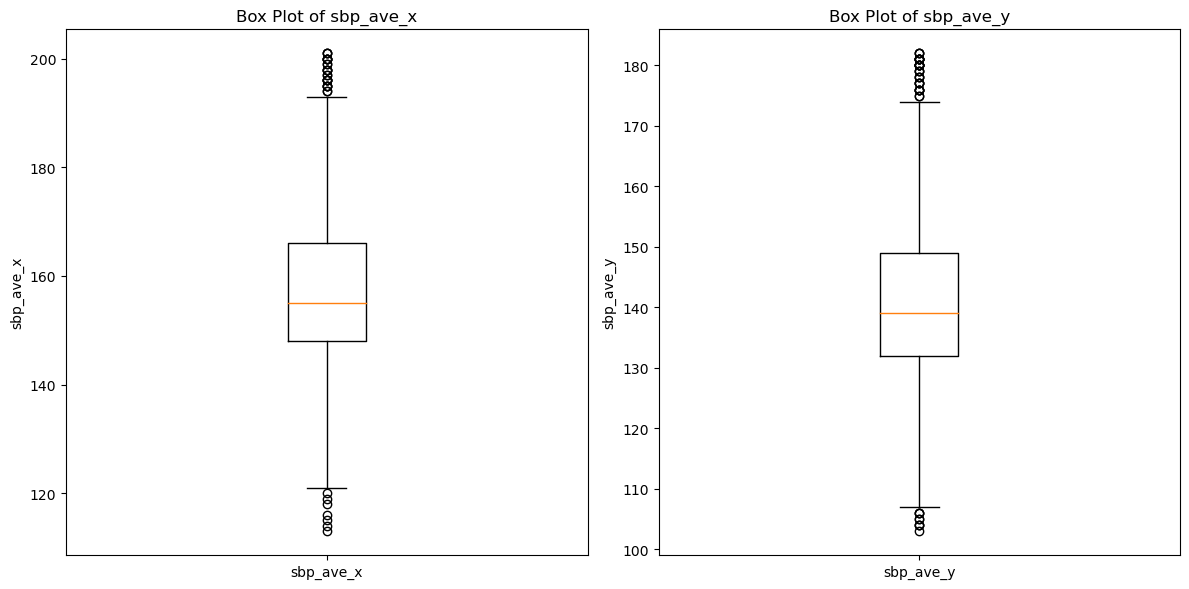

In [48]:
plt.figure(figsize=(12, 6))

# Box plot for sbp_ave_x
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.boxplot(df_complete_data['sbp_ave_x'].dropna())  # Ensure there are no NaN values
plt.title('Box Plot of sbp_ave_x')
plt.ylabel('sbp_ave_x')
plt.xticks([1], ['sbp_ave_x'])

# Box plot for sbp_ave_y
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.boxplot(df_complete_data['sbp_ave_y'].dropna())  # Ensure there are no NaN values
plt.title('Box Plot of sbp_ave_y')
plt.ylabel('sbp_ave_y')
plt.xticks([1], ['sbp_ave_y'])

plt.tight_layout()  # Adjusts the layout to prevent overlap
plt.show()

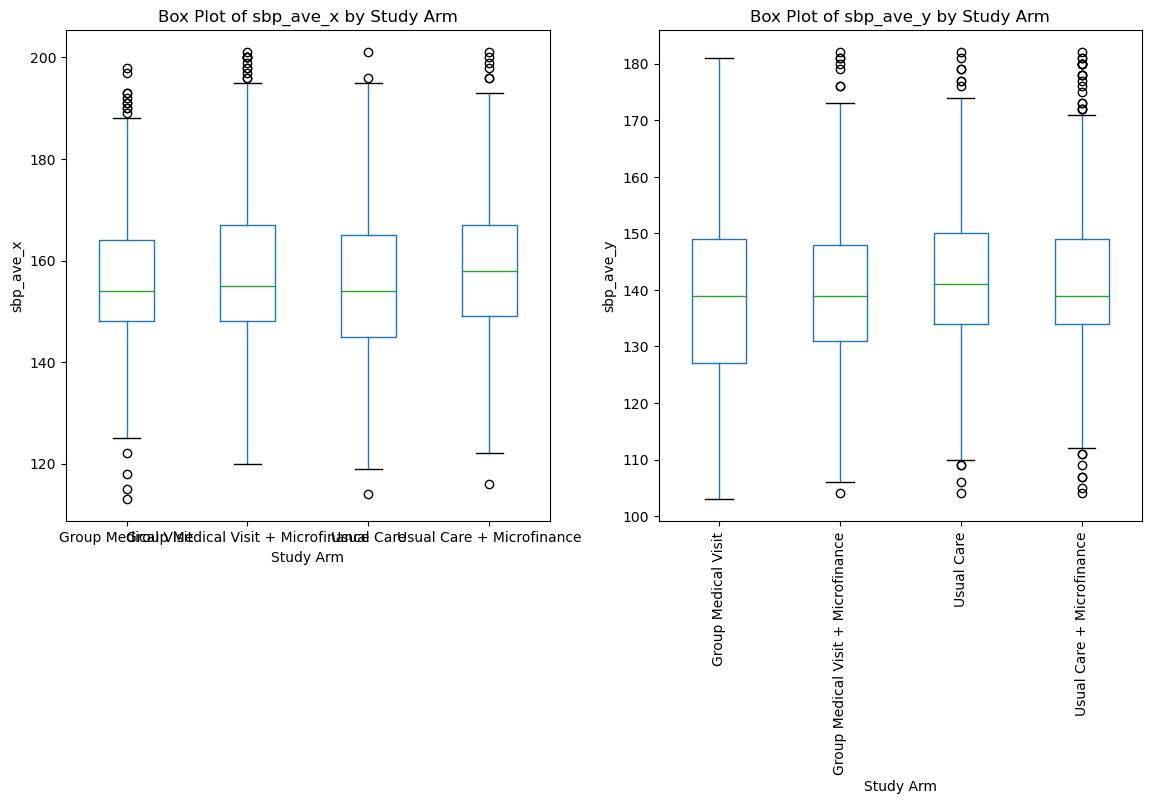

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for 'sbp_ave_x' by 'study_arm'
df_complete_data.boxplot(column= 'sbp_ave_x', by='study_arm', grid=False, ax=ax[0])
ax[0].set_title('Box Plot of sbp_ave_x by Study Arm')
ax[0].set_xlabel('Study Arm')
ax[0].set_ylabel('sbp_ave_x')
ax[0].set_title('Box Plot of sbp_ave_x by Study Arm')
plt.xticks(rotation=90)

# Box plot for 'sbp_ave_y' by 'study_arm'
df_complete_data.boxplot(column='sbp_ave_y', by='study_arm', grid=False, ax=ax[1])
ax[1].set_title('Box Plot of sbp_ave_y by Study Arm')
ax[1].set_xlabel('Study Arm')
ax[1].set_ylabel('sbp_ave_y')

# Adjust layout
plt.suptitle('')  # Suppress the automatic title to avoid overlap
plt.tight_layout()  # Adjusts the layout to prevent overlap
plt.xticks(rotation=90)
plt.show();


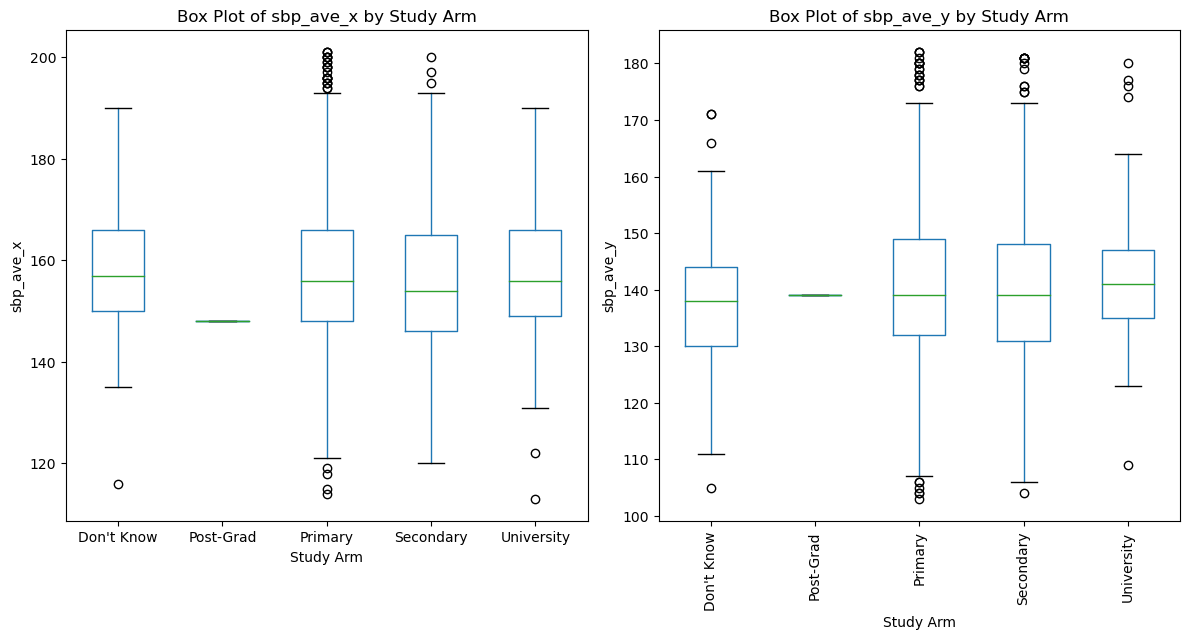

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for 'sbp_ave_x' by 'study_arm'
df_complete_data.boxplot(column= 'sbp_ave_x', by='highest_level', grid=False, ax=ax[0])
ax[0].set_title('Box Plot of sbp_ave_x by Study Arm')
ax[0].set_xlabel('Study Arm')
ax[0].set_ylabel('sbp_ave_x')
ax[0].set_title('Box Plot of sbp_ave_x by Study Arm')
plt.xticks(rotation=90)

# Box plot for 'sbp_ave_y' by 'study_arm'
df_complete_data.boxplot(column='sbp_ave_y', by='highest_level', grid=False, ax=ax[1])
ax[1].set_title('Box Plot of sbp_ave_y by Study Arm')
ax[1].set_xlabel('Study Arm')
ax[1].set_ylabel('sbp_ave_y')

# Adjust layout
plt.suptitle('')  # Suppress the automatic title to avoid overlap
plt.tight_layout()  # Adjusts the layout to prevent overlap
plt.xticks(rotation=90)
plt.show();

In [52]:
gender_counts = df_complete_data['gender'].value_counts()
group_counts = df_complete_data['study_arm'].value_counts()
highest_level_counts = df_complete_data["highest_level"].value_counts()
age_counts = df_complete_data["age_est"]

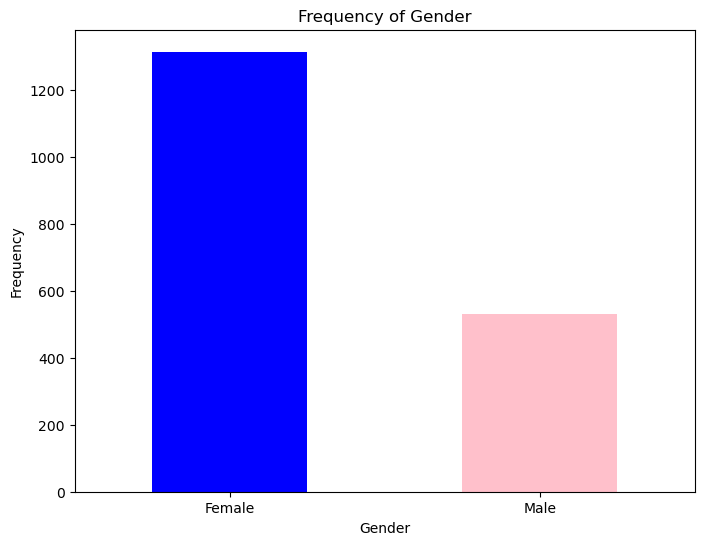

In [53]:
# Plot the frequency of each gender
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Frequency of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate labels if necessary
plt.show()

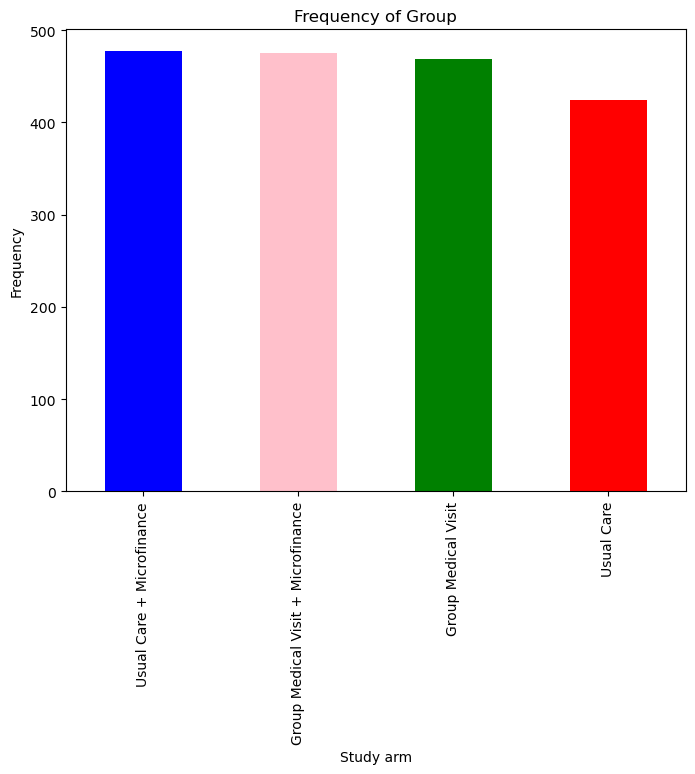

In [54]:
# Plot the frequency of each gender
plt.figure(figsize=(8, 6))
group_counts.plot(kind='bar', color=['blue', 'pink', "green", "red"])
plt.title('Frequency of Group')
plt.xlabel('Study arm')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate labels if necessary
plt.show()

In [55]:
df_complete_data.to_csv("Desktop/Dataset/df_complete_data.csv")

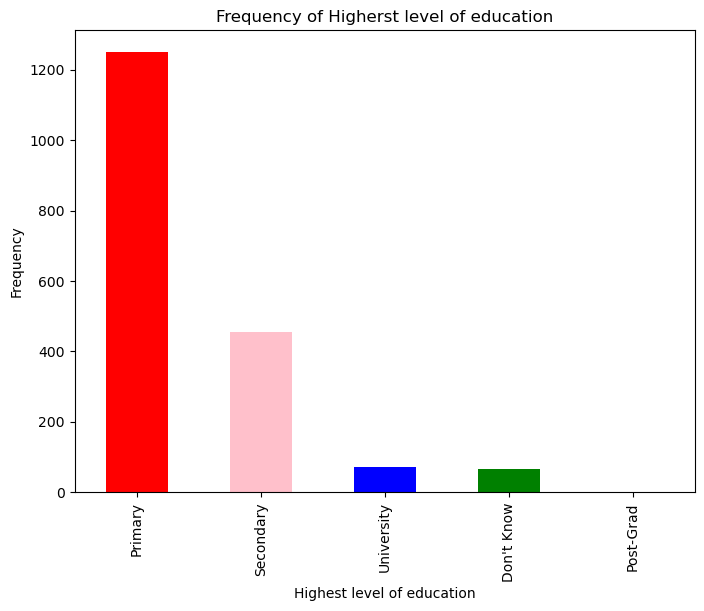

In [58]:

# Plot the frequency of each gender
plt.figure(figsize=(8, 6))
highest_level_counts.plot(kind='bar', color=["red", "pink", "blue", "green"])
plt.title('Frequency of Higherst level of education')
plt.xlabel('Highest level of education')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

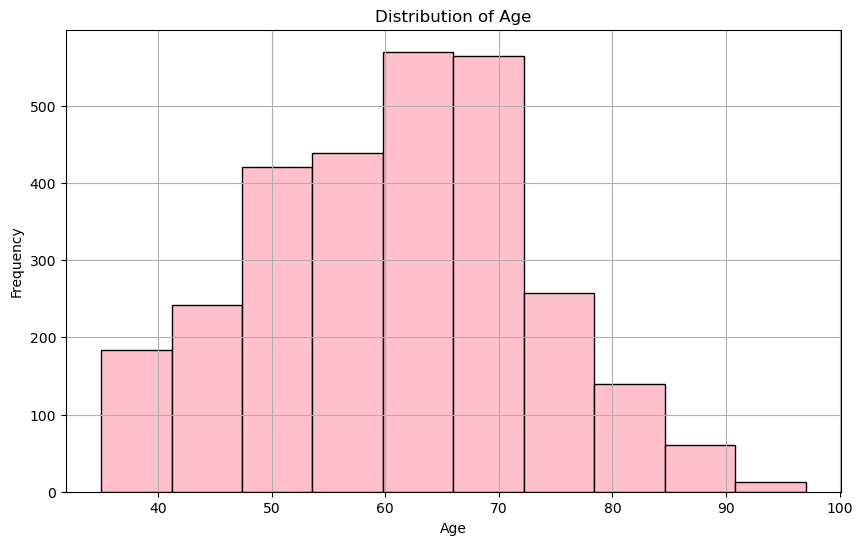

In [59]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df_baseline['age_est'], bins=10, edgecolor='black', color='pink')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

In [68]:
# Contains all the data needed
df_cleanandcomplete = df_complete_data.drop(columns=["bmi_x","sbp_ave_x","dbp_ave_x",
                                                     "bsg_x","total_chol_x", "bmi_y",
                                                     "sbp_ave_y","dbp_ave_y",
                                                     "bsg_y","total_chol_y","disposition_12m"])
df_cleanandcomplete.head()

,participant_id,highest_level,iwi,QRISK3,age_est,gender,study_arm,difference_sbp,difference_dbp,difference_bsg,difference_bmi,difference_chol
0,301001,Primary,11.25,7.34,67.0,Female,Group Medical Visit + Microfinance,-3.0,3.0,-1.9,-3.9,-0.36
1,301002,Primary,15.33,5.24,60.0,Male,Group Medical Visit + Microfinance,-16.0,-2.0,-0.1,2.8,0.16
2,301003,Primary,15.27,10.15,67.0,Male,Group Medical Visit + Microfinance,14.0,6.0,-0.6,1.0,0.28
3,301004,Primary,31.25,4.06,56.0,Female,Group Medical Visit + Microfinance,-7.0,-11.0,-0.1,4.9,1.03
4,301005,Don't Know,4.12,7.61,67.0,Female,Group Medical Visit + Microfinance,-31.0,-4.0,-0.2,7.4,0.61


In [69]:
# Saving the clean and complete data to csv
df_cleanandcomplete.to_csv("Desktop/Dataset/df_cleanandcomplete.csv")

In [70]:
label_encoder = LabelEncoder()
#Encode all the columns that have object as the data type
for column in df_cleanandcomplete.columns:
    if df_cleanandcomplete[column].dtype == 'object':  # Check if the column is categorical
        df_cleanandcomplete[column] = label_encoder.fit_transform(df_cleanandcomplete[column])


In [71]:
df_cleanandcomplete.head()

,participant_id,highest_level,iwi,QRISK3,age_est,gender,study_arm,difference_sbp,difference_dbp,difference_bsg,difference_bmi,difference_chol
0,301001,2,11.25,7.34,67.0,0,1,-3.0,3.0,-1.9,-3.9,-0.36
1,301002,2,15.33,5.24,60.0,1,1,-16.0,-2.0,-0.1,2.8,0.16
2,301003,2,15.27,10.15,67.0,1,1,14.0,6.0,-0.6,1.0,0.28
3,301004,2,31.25,4.06,56.0,0,1,-7.0,-11.0,-0.1,4.9,1.03
4,301005,0,4.12,7.61,67.0,0,1,-31.0,-4.0,-0.2,7.4,0.61


In [72]:
df_cleanandcomplete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1845 entries, 0 to 2888
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   participant_id   1845 non-null   int64  
 1   highest_level    1845 non-null   int32  
 2   iwi              1845 non-null   float64
 3   QRISK3           1845 non-null   float64
 4   age_est          1845 non-null   float64
 5   gender           1845 non-null   int32  
 6   study_arm        1845 non-null   int32  
 7   difference_sbp   1845 non-null   float64
 8   difference_dbp   1845 non-null   float64
 9   difference_bsg   1845 non-null   float64
 10  difference_bmi   1845 non-null   float64
 11  difference_chol  1845 non-null   float64
dtypes: float64(8), int32(3), int64(1)
memory usage: 165.8 KB


In [73]:
#standardize using min-max scaler
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns
numerical_cols = df_cleanandcomplete.select_dtypes(include=['float64', 'int64','int32']).columns

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler only to numerical columns
df_cleanandcomplete[numerical_cols] = scaler.fit_transform(df_cleanandcomplete[numerical_cols])

In [74]:
df_cleanandcomplete.head()

,participant_id,highest_level,iwi,QRISK3,age_est,gender,study_arm,difference_sbp,difference_dbp,difference_bsg,difference_bmi,difference_chol
0,0.000000,0.5,0.099766,0.276929,0.615385,0.0,0.333333,0.585714,0.593023,0.290698,0.444444,0.473389
1,0.000003,0.5,0.155910,0.194673,0.480769,1.0,0.333333,0.492857,0.534884,0.500000,0.635328,0.546218
2,0.000007,0.5,0.155085,0.386996,0.615385,1.0,0.333333,0.707143,0.627907,0.441860,0.584046,0.563025
3,0.000010,0.5,0.374983,0.148453,0.403846,0.0,0.333333,0.557143,0.430233,0.500000,0.695157,0.668067
4,0.000013,0.0,0.001651,0.287505,0.615385,0.0,0.333333,0.385714,0.511628,0.488372,0.766382,0.609244


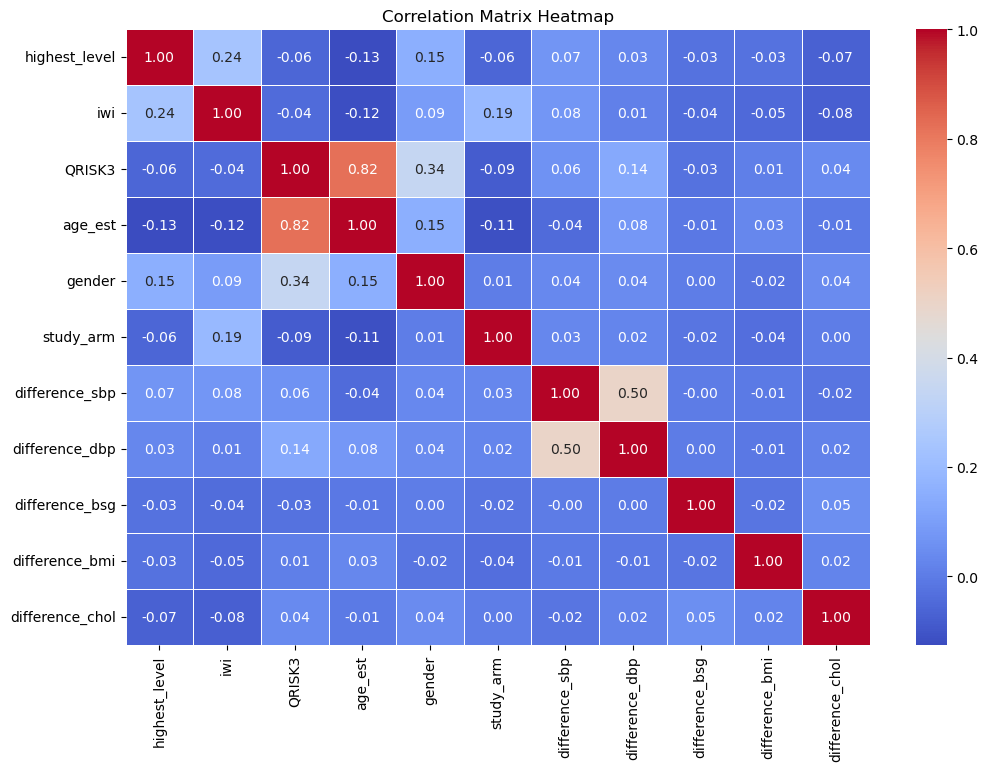

In [75]:
correlation_matrix = df_cleanandcomplete.iloc[:, 1:].corr()
# Set the size of the heatmap
plt.figure(figsize=(12, 8))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Set the title of the heatmap
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

In [84]:
X = df_cleanandcomplete.drop(columns=['difference_sbp',"participant_id","difference_dbp"])
y = df_cleanandcomplete['difference_sbp']
y = y.astype('int')

In [85]:
#if 'difference_sbp' in df_cleanandcomplete.columns:
# X = df_cleanandcomplete.drop(columns=['difference_sbp')
#y = df_cleanandcomplete['difference_sbp']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)


In [86]:
# Output the formula of the linear regression model
feature_names = X.columns
coefficients = model.coef_
intercept = model.intercept_

formula = "y = " + " + ".join([f"{coef:.4f}*{name}" for coef, name in zip(coefficients, feature_names)]) + f" + {intercept:.4f}"
print("Linear Regression Formula:")
print(formula)

# Calculate and print the accuracy
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

Linear Regression Formula:
y = -0.0128*highest_level + -0.0034*iwi + -0.0037*QRISK3 + -0.0027*age_est + 0.0039*gender + 0.0018*study_arm + 0.0004*difference_bsg + -0.0026*difference_bmi + 0.0129*difference_chol + 0.0044
R-squared: 0.0000
Mean Squared Error: 0.0000
